In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df = pd.read_excel (r'Data/Q_data_9.xlsx')
print(df.shape)

In [72]:
GENDER = 10
HAND = 11
HMD = 15
VR = 12
GAMES = 13
SSQs = [16]
SYMPTOMS = ["General Discomfort", "Fatigue", "Headache", "Eyestrain", "Difficulty Focusing", "Blurred Vision", "Dizziness", "Vertigo"]
oculSymptoms = ("General Discomfort", "Fatigue", "Eyestrain", "Difficulty Focusing")
disSymptoms = ("Headache", "Blurred Vision", "Dizziness", "Vertigo")

In [43]:
print (df.iloc[:,HMD])

0    Quest 1
1    Quest 2
2    Quest 2
3    Quest 2
4    Quest 2
5    Quest 2
6    Quest 1
7    Quest 2
8    Quest 1
Name: Which HMD are you using?, dtype: object


(9, 130)


In [36]:
# Count males and females
males = 0
females = 0

for g in df.iloc[:,GENDER]:
    if g == "Male":
        males += 1
    else:
        females += 1

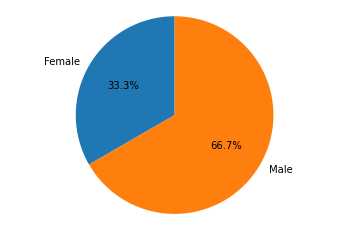

In [41]:
# Pie chart for gender
labels = ['Female', 'Male']
sizes = [females, males]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [44]:
# Count Quest 1s and 2s
q1 = 0
q2 = 0

for g in df.iloc[:,HMD]:
    if g == "Quest 1":
        q1 += 1
    else:
        q2 += 1

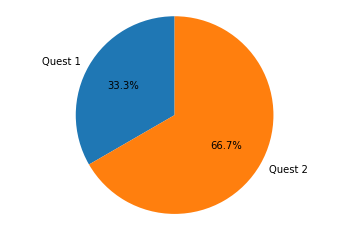

In [45]:
# Pie chart for gender
labels = ['Quest 1', 'Quest 2']
sizes = [q1, q2]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [52]:
# count how many times you have played vr before
VRcount = [0,0,0,0,0]
for g in df.iloc[:,VR]:
    if g == "Never":
        VRcount[0] += 1
    elif g == "1 - 3 times":
        VRcount[1] += 1
    elif g == "4 - 6 times":
        VRcount[2] += 1
    elif g == "7 - 9 times":
        VRcount[3] += 1
    elif g == "10 or more":
        VRcount[4] += 1

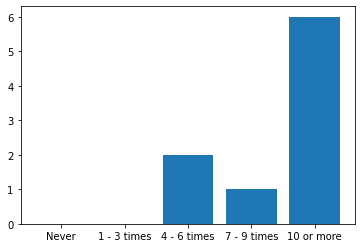

In [49]:
fig1, ax1 = plt.subplots()
time_frame = ['Never', '1 - 3 times', '4 - 6 times', '7 - 9 times', '10 or more']
ax1.bar(time_frame,VRcount)
plt.show()

In [53]:
# count how many times you have played game before
Gamecount = [0,0,0,0,0]
for g in df.iloc[:,GAMES]:
    if g == "Never":
        Gamecount[0] += 1
    elif g == "1 - 2 times":
        Gamecount[1] += 1
    elif g == "2 -5 times":
        Gamecount[2] += 1
    elif g == "5 - 7 times":
        Gamecount[3] += 1
    elif g == "7+ times":
        Gamecount[4] += 1

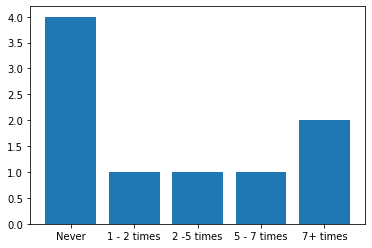

In [54]:
fig1, ax1 = plt.subplots()
time_frame = ['Never', '1 - 2 times', '2 -5 times', '5 - 7 times', '7+ times']
ax1.bar(time_frame,Gamecount)
plt.show()

In [66]:
t = df.iloc[0,SSQs[0]:SSQs[0]+9]


Not at all


Not at all


In [107]:
def feelingToNumber(vals):
    ret = []
    for val in vals:
        if val == 'Not at all':
            ret.append(0)
        elif val == 'Slightly':
            ret.append(1)
        elif val == 'Moderately':
            ret.append(2)
        elif val == 'Very':
            ret.append(3)
        else:
            print('Wrong Value')
    return ret[0] if len(ret) == 1 else ret

In [81]:
def oculDisSplit(vals):
    """Input: df of one VRSSQ
    
    Return: Two lists with Oculomotor and Disorientation results"""
    ocul = []
    dis = []
    for i in range(len(SYMPTOMS)):
        if SYMPTOMS[i] in oculSymptoms:
            ocul.append(vals[i])
        elif SYMPTOMS[i] in disSymptoms:
            dis.append(vals[i])
    return ocul, dis

In [97]:
def calcOculScore(vals):
    score = 0
    for val in vals:
        score += feelingToNumber([val])
    score = (score/12)*100
    return score

In [101]:
def calcDisScore(vals):
    score = 0
    for val in vals:
        score += feelingToNumber([val])
    score = (score/15)*100
    return score

In [84]:
def calcTotalScore(o, d):
    return (o+d)/2

In [95]:
def calcVRSQ(result):
    ocul, dis = oculDisSplit(result)
    oculScore = calcOculScore(ocul)
    disScore = calcDisScore(dis)
    totalScore = calcTotalScore(oculScore, disScore)
    return oculScore, disScore, totalScore

In [110]:
test = df.iloc[1,SSQs[0]:SSQs[0]+9]
print(test)
o, d, t = calcVRSQ(test)
print(0)
print("Oculomotor Score: {}\nDisorientation Score: {}\nTotal Score: {}".format(o, d, t))

General Discomfort           Slightly
Fatigue                    Moderately
Headache                   Not at all
Eyestrain                    Slightly
Difficulty Focusing          Slightly
Blurred Vision               Slightly
Dizziness (eyes closed)      Slightly
Vertigo                      Slightly
Fullness of Head             Slightly
Name: 1, dtype: object
0
Oculomotor Score: 41.66666666666667
Disorientation Score: 20.0
Total Score: 30.833333333333336
